In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk

In [2]:
dfOutcomes = pd.read_csv("sc3_Phase1_CN_GE_Outcome.tsv",sep="\t");
dfOutcomes['SURVIVAL_STATUS'].value_counts()
#dfOutcomes.info()

1    126
0     40
Name: SURVIVAL_STATUS, dtype: int64

In [3]:
dfPhenotypes = pd.read_csv("sc3_Phase1_CN_GE_Phenotype.tsv",sep="\t")
dfPhenotypes = dfPhenotypes.replace(r'^\s*$', np.nan, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^IV', 4, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^III', 3, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^II', 2, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^I', 1, regex=True)
dfPhenotypes['WHO_GRADING'].replace(np.nan, 0, regex=True,inplace=True)
dfPhenotypes.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_100,MALE,WHITE,4.0,GBM
1,patient_102,NaN,NaN,0.0,GBM
2,patient_104,MALE,WHITE,3.0,MIXED
3,patient_117,MALE,WHITE,0.0,GBM
4,patient_119,MALE,WHITE,3.0,ASTROCYTOMA


In [4]:
dfFeatures = pd.read_csv("sc3_Phase1_CN_GE_FeatureMatrix.tsv",sep="\t")
dfFeatures.head()

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,22q11.22,22q11.23,22q12.1,22q12.2,22q12.3,22q13.1,22q13.2,22q13.31,22q13.32,22q13.33
0,patient_100,6.712669,6.689301,5.629170,12.794882,5.952521,6.266316,6.884509,6.139782,6.421307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,patient_102,6.417048,6.581860,5.353415,13.297073,5.960088,5.321208,7.095273,5.896738,6.277470,...,0.000000,0.000000,0.000000,1.087516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,patient_104,6.496176,6.821401,5.388386,12.559299,6.171418,5.382789,7.073508,6.036521,6.315204,...,0.000000,0.000000,0.726699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,patient_117,7.018971,6.520754,5.437291,12.649568,6.401446,5.018791,6.627632,6.195179,6.276527,...,0.729810,0.000000,0.593759,0.663731,0.599695,0.000000,0.000000,0.620058,0.656618,0.656618
4,patient_119,6.493741,6.516461,5.354844,12.494806,6.555188,5.556890,6.750667,6.001066,6.338923,...,0.740904,1.065425,0.908043,2.020120,1.839099,1.101582,1.093675,0.885572,0.634195,0.000000


In [5]:
dfs = pd.merge(dfPhenotypes,dfOutcomes,how="inner",on="PATIENTID")
dfMerged = pd.merge(dfs,dfFeatures,how="inner",on="PATIENTID")
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Columns: 20152 entries, PATIENTID to 22q13.33
dtypes: float64(20126), int64(22), object(4)
memory usage: 25.5+ MB


In [6]:
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNKNOWN']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNCLASSIFIED']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'MIXED']
#dfMerged = dfMerged[dfMerged.WHO_GRADING != 0]
dfCount = dfMerged[dfMerged['SURVIVAL_STATUS']==0]
dfCount.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS,A1BG,A1BG.AS1,A1CF,A2M,...,22q11.22,22q11.23,22q12.1,22q12.2,22q12.3,22q13.1,22q13.2,22q13.31,22q13.32,22q13.33
0,patient_100,MALE,WHITE,4.0,GBM,0,6.712669,6.689301,5.629170,12.794882,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,patient_117,MALE,WHITE,0.0,GBM,0,7.018971,6.520754,5.437291,12.649568,...,0.72981,0.0,0.593759,0.663731,0.599695,0.000000,0.00000,0.620058,0.656618,0.656618
11,patient_159,MALE,WHITE,3.0,ASTROCYTOMA,0,6.570584,6.661641,5.590651,12.615778,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
13,patient_162,FEMALE,WHITE,2.0,OLIGODENDROGLIOMA,0,6.544692,6.983810,5.366946,11.902424,...,0.00000,0.0,0.000000,1.003063,1.452331,0.792646,0.00000,0.000000,0.000000,0.000000
16,patient_168,MALE,WHITE,0.0,UNKNOWN,0,6.633014,6.662794,5.531246,12.203776,...,0.00000,0.0,0.000000,0.000000,0.000000,0.772870,0.59694,0.000000,0.000000,0.000000


In [7]:
dfMergedDownSampledOutcomes=pd.concat([
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 1].sample(n=len(dfCount.index)*6,replace=True),
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 0].sample(n=len(dfCount.index)*5,replace=True)
])
dfMergedDownSampledOutcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 93 to 102
Columns: 20152 entries, PATIENTID to 22q13.33
dtypes: float64(20126), int64(22), object(4)
memory usage: 67.6+ MB


In [13]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, SelectKBest, f_regression, RFE, mutual_info_classif
X = dfMergedDownSampledOutcomes
X = X.drop(columns=['PATIENTID','SEX','WHO_GRADING','RACE','CANCER_TYPE','SURVIVAL_STATUS'])
y = dfMergedDownSampledOutcomes.iloc[:,4]
y.value_counts()

GBM                  196
UNKNOWN               93
ASTROCYTOMA           87
OLIGODENDROGLIOMA     49
MIXED                 14
UNCLASSIFIED           1
Name: CANCER_TYPE, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#X

In [16]:
bestfeatures = SelectKBest(score_func=chi2, k=500)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Genes','Score']  #naming the dataframe columns
#print(featureScores.nlargest(200,'Score'))  #print 10 best features

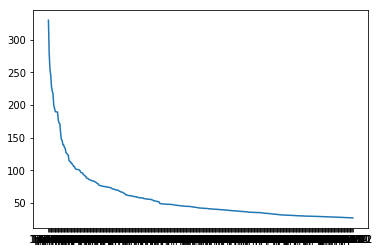

In [17]:
import matplotlib.pyplot as plt
Vals= featureScores.nlargest(400,'Score')  #print 10 best features
xVal = Vals['Genes']
yVal = Vals['Score']
plt.plot(xVal,yVal)  #print 10 best features
plt.show()

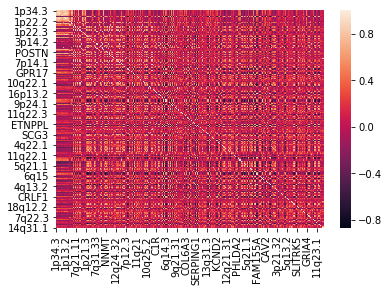

In [18]:
selCols = pd.Series(['SURVIVAL_STATUS'])
dfSelectedY = dfMergedDownSampledOutcomes.loc[:,selCols]
#xValDup = pd.Series(['CHI3L1','PTX3','COL3A1','IGFBP2','ADM','LTF','COL1A1'])
dfSelectedX = dfMergedDownSampledOutcomes.loc[:,xVal[0:]]
#print(dfSelectedX)

import seaborn as sns
corrMap = dfSelectedX.corr()
sns.heatmap(corrMap)

In [19]:
dfT = dfSelectedX
# Create correlation matrix
corr_matrix = dfT.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#print(upper)
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['COL1A1', '10q11.1', 'COL1A2', 'COL4A1', '1q11', '1q12']


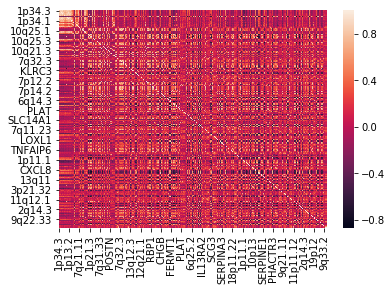

In [20]:
# Drop features 
dfT.drop(to_drop, axis=1,inplace=True)
corrMap = dfT.corr()
sns.heatmap(corrMap)
dfSelectedX = dfT

In [23]:
list(dfSelectedX)

['1p34.3',
 '1p31.1',
 '1p36.21',
 '1p36.12',
 '1p13.3',
 '1p36.13',
 '1p34.2',
 '1p32.2',
 '1p32.3',
 '1p35.3',
 '1p35.1',
 'CHI3L1',
 '1p36.11',
 '1p33',
 '1p36.32',
 '1p13.2',
 '1p31.3',
 '1p36.22',
 '1p34.1',
 '1p22.2',
 '1p22.1',
 '19q12',
 '19q13.32',
 '7p11.2',
 '1p32.1',
 '1p13.1',
 '19q13.11',
 '7p15.3',
 '19q13.42',
 '1p21.1',
 '7q21.11',
 '2q36.2',
 '7p12.1',
 '10q21.1',
 '1p35.2',
 '7p21.1',
 '10q25.1',
 '10q22.3',
 '1p22.3',
 '8q24.22',
 '1p21.2',
 '19q13.13',
 '19q13.31',
 '1q22',
 'EMP3',
 '1p21.3',
 '7p21.3',
 'TIMP1',
 'IGFBP2',
 'PTX3',
 '1p36.23',
 '7q33',
 'LTF',
 '1p31.2',
 '10q25.3',
 '9q34.12',
 '9p21.3',
 '3p14.2',
 'ANXA1',
 'COL3A1',
 '7q31.33',
 '8q23.3',
 '10q23.31',
 '8q24.12',
 '1q21.3',
 'ADM',
 '19q13.2',
 '10q26.11',
 '10q23.1',
 '8q24.11',
 '13q12.12',
 '1p36.31',
 '10q21.3',
 '19q13.41',
 'NNMT',
 'POSTN',
 '8q24.23',
 '7q21.3',
 '8q21.3',
 '1p12',
 '7p14.3',
 '19q13.33',
 '19q13.12',
 '10q21.2',
 '7q21.13',
 '7p15.2',
 '13q13.1',
 '9q33.1',
 '14q31.3

In [25]:
####SVM####
from sklearn import svm
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

clf = svm.SVC(kernel='rbf',gamma='auto',decision_function_shape='ovr')
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

scaler = StandardScaler()

totScore=0
totSensitivity = 0
totSpecificity = 0
totAUC = 0
i=0

for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    #print(x_train)
    #x_train = scaler.fit_transform(x_train)
    #x_test = scaler.fit_transform(x_test)
    
    #clf.fit(dfSelectedX, dfSelectedY.values.ravel())
    clf.fit(x_train, y_train.values.ravel())
    
    predictions = clf.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    print(multilabel_confusion_matrix(y_test, predictions))
    print("\n-----------------------------")
    tn,fp,fn,tp = confusion_matrix(y_test, predictions).ravel()
    print(" tn\tfp\tfn\t tp\n",tn,"\t",fp,"\t",fn,"\t",tp)
    score = clf.score(x_test, y_test)
    sensitivity = tp*100/(tp+fn)
    specificity = tn*100/(tn+fp)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
    auc = metrics.auc(fpr, tpr)
    print("\naccuracy:", score)
    print("sensitivity:", sensitivity)
    print("specificity:", specificity)
    print("AUC:", auc)
    print("-----------------------------\n")
    score = clfNN.score(x_test, y_test)
    totScore = totScore + score
    totSensitivity = totSensitivity + sensitivity
    totSpecificity = totSpecificity + specificity
    totAUC = totAUC + auc
    i=i+1
    
print("average accuracy:", totScore/i)
print("average sensitivity:", totSensitivity/i)
print("average specificity:", totSpecificity/i)
print("average AUC:", totAUC/i)

[[[24  0]
  [ 0 20]]

 [[20  0]
  [ 0 24]]]

-----------------------------
 tn	fp	fn	 tp
 20 	 0 	 0 	 24

accuracy: 1.0
sensitivity: 100.0
specificity: 100.0
AUC: 1.0
-----------------------------

[[[22  2]
  [ 0 20]]

 [[20  0]
  [ 2 22]]]

-----------------------------
 tn	fp	fn	 tp
 20 	 0 	 2 	 22

accuracy: 0.9545454545454546
sensitivity: 91.66666666666667
specificity: 100.0
AUC: 0.9583333333333333
-----------------------------

[[[24  0]
  [ 0 20]]

 [[20  0]
  [ 0 24]]]

-----------------------------
 tn	fp	fn	 tp
 20 	 0 	 0 	 24

accuracy: 1.0
sensitivity: 100.0
specificity: 100.0
AUC: 1.0
-----------------------------

[[[23  1]
  [ 0 20]]

 [[20  0]
  [ 1 23]]]

-----------------------------
 tn	fp	fn	 tp
 20 	 0 	 1 	 23

accuracy: 0.9772727272727273
sensitivity: 95.83333333333333
specificity: 100.0
AUC: 0.9791666666666667
-----------------------------

[[[23  1]
  [ 0 20]]

 [[20  0]
  [ 1 23]]]

-----------------------------
 tn	fp	fn	 tp
 20 	 0 	 1 	 23

accuracy: 0.9